<a href="https://colab.research.google.com/github/hauduong05/ML_basics/blob/main/Logistic_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# prepare data and preprocessing data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

scalar = StandardScaler() # transform data into standard 
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [6]:
# build model

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

In [ ]:
# initial hyperparameters and model

learning_rate = 0.01
n_epochs = 10000

model = LogisticRegression(n_features)
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# train

train_loss = []
for epoch in range(n_epochs):
  y_pred = model(X_train)
  l = loss(y_pred, y_train)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch+1) % 5 == 0:
    print(f'epoch {epoch+1} : loss = {l.item():.3f}')
    train_loss.append(l)

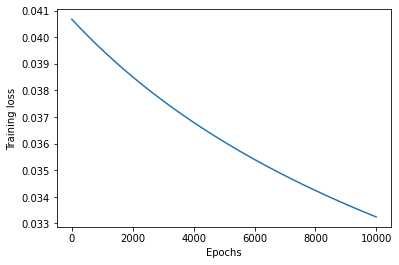

In [13]:
# plot training losses

fig = plt.figure()
plt.plot(np.arange(len(train_loss)) * 5, train_loss)
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

In [11]:
# test

with torch.no_grad():
  y_pred = model(X_test)
  y_pred_cls = y_pred.round()
  acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')

accuracy = 0.9649
